<a href="https://colab.research.google.com/github/Priyasri0210/DS-problems/blob/main/Homework_problems/Python_packages/Project/World_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORLD POPULATION ANALYSIS**

In [2]:

import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

**Scrape data from url**

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
headers = {'user-Agent':"Mozilla/5.0"}
response = requests.get(url, headers=headers)
print(response)


<Response [200]>


In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
#soup

In [5]:
table = soup.find("table",{"class":'wikitable'})
df = pd.read_html(str(table))[0]
df.head()


<ipython-input-5-652b9a538e5d>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,World,8141520550,100%,10 May 2025,UN projection[1][3],NaN
1,India,1413324000,17.3%,1 Mar 2025,Official projection[4],[b]
2,China,1408280000,17.2%,31 Dec 2024,Official estimate[5],[c]
3,United States,340110988,4.2%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection[7],NaN


**Data cleaning**

In [6]:
new_df = df[['Location','Population','% of world']]
new_df.head()



,Location,Population,% of world
0,World,8141520550,100%
1,India,1413324000,17.3%
2,China,1408280000,17.2%
3,United States,340110988,4.2%
4,Indonesia,282477584,3.5%


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    240 non-null    object
 1   Population  240 non-null    int64 
 2   % of world  240 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


In [8]:
new_df['% of world']=new_df['% of world'].str.replace('%','')
new_df.head()

<ipython-input-8-039454c20b15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['% of world']=new_df['% of world'].str.replace('%','')


,Location,Population,% of world
0,World,8141520550,100
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5


In [9]:
# new_df['% of world'] = new_df['% of world'].astype(float)
# new_df
new_df['% of world'] = pd.to_numeric( new_df['% of world'],errors='coerce')
new_df.head()

<ipython-input-9-51ba0106db8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['% of world'] = pd.to_numeric( new_df['% of world'],errors='coerce')


,Location,Population,% of world
0,World,8141520550,100.0
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    240 non-null    object 
 1   Population  240 non-null    int64  
 2   % of world  240 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [11]:
new_df.fillna('0')


,Location,Population,% of world
0,World,8141520550,100.0
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5
...,...,...,...
235,Niue (New Zealand),1681,0.0
236,Tokelau (New Zealand),1647,0.0
237,Vatican City,882,0.0
238,Cocos (Keeling) Islands (Australia),593,0.0


In [12]:
new_df=new_df.drop(index=0,axis=0)
new_df.head()

,Location,Population,% of world
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5
5,Pakistan,241499431,3.0


In [13]:
new_df.columns = ['Country','Population','World spread(%)']
new_df.head()

,Country,Population,World spread(%)
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5
5,Pakistan,241499431,3.0


**Data Analysis**

In [14]:
# using Pandas
new_df['Population'].mean()

np.float64(33358734.635983262)

In [15]:
new_df['Population'].median()

5483450.0

In [16]:
new_df['Population'].std()

134578468.70317358

In [17]:
top_10 = new_df.sort_values(by='Population',ascending=False).head(10)
top_10

,Country,Population,World spread(%)
1,India,1413324000,17.3
2,China,1408280000,17.2
3,United States,340110988,4.2
4,Indonesia,282477584,3.5
5,Pakistan,241499431,3.0
6,Nigeria,223800000,2.7
7,Brazil,212583750,2.6
8,Bangladesh,169828911,2.1
9,Russia,146028325,1.8
10,Mexico,130294079,1.6


In [18]:
# using numpy - mean , median , Std.deviation
np.mean(new_df['Population'])


np.float64(33358734.635983262)

In [19]:
np.median(new_df['Population'])

np.float64(5483450.0)

In [20]:
np.std(new_df['Population'])

134296628.66878983

**Data Visualization**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


 **visualization based on Population **

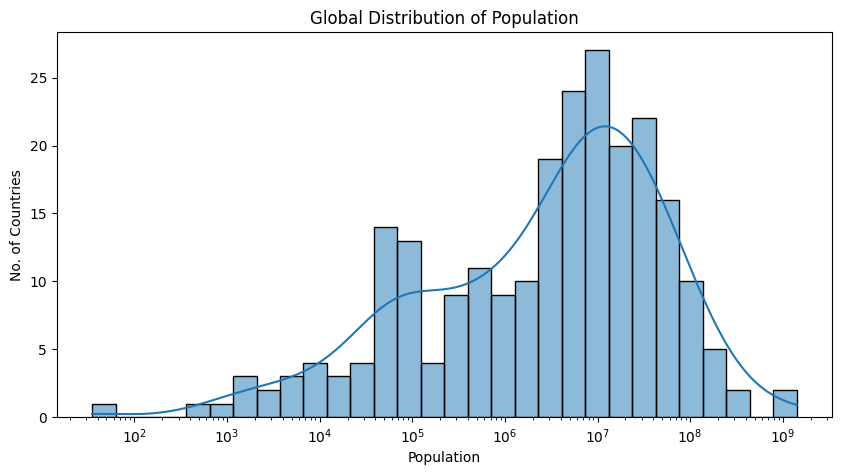

In [22]:
# using Population column for visualization
# Histogram
plt.figure(figsize = (10,5))
sns.histplot(new_df['Population'],bins=30,log_scale=True,kde=True)
plt.title('Global Distribution of Population')
plt.xlabel('Population')
plt.ylabel('No. of Countries')
plt.show()

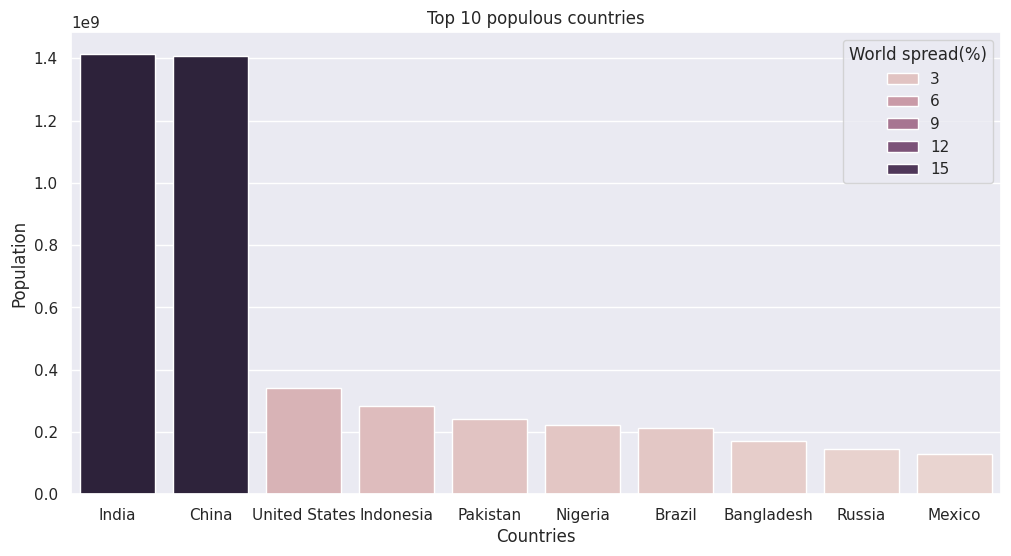

In [23]:
# using Population column for visualization
# Barchart
plt.figure(figsize = (12,6))
sns.set_theme(style='darkgrid')
sns.barplot(x='Country',y='Population',hue='World spread(%)',data=top_10)
#plt.xticks(rotation=0)
plt.title('Top 10 populous countries')
plt.xlabel('Countries')
plt.ylabel('Population')
plt.show()

In [24]:
# package for mapping countries to continent
!pip install pycountry_convert
import pycountry_convert as pc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 6.3 MB/s eta 0:00:00


In [25]:
# mapping countries to continent based on code

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'
# adding new column (Continent) and mapping countries
new_df['Continent'] = new_df['Country'].apply(country_to_continent)

In [26]:
new_df

,Country,Population,World spread(%),Continent
1,India,1413324000,17.3,Asia
2,China,1408280000,17.2,Asia
3,United States,340110988,4.2,North America
4,Indonesia,282477584,3.5,Asia
5,Pakistan,241499431,3.0,Asia
...,...,...,...,...
235,Niue (New Zealand),1681,0.0,Unknown
236,Tokelau (New Zealand),1647,0.0,Unknown
237,Vatican City,882,0.0,Unknown
238,Cocos (Keeling) Islands (Australia),593,0.0,Unknown


In [27]:
new_df.groupby('Continent').count()

,Country,Population,World spread(%)
Continent,,,
Africa,54,54,54
Asia,49,49,49
Europe,43,43,43
North America,23,23,23
Oceania,14,14,14
South America,12,12,12
Unknown,44,44,44


In [28]:
# displaying Unknown countries
Unknown_countries = new_df[new_df['Continent'] == 'Unknown' ]
Unknown_countries


,Country,Population,World spread(%),Continent
104,Hong Kong (China),7534200,0.0900,Unknown
136,Puerto Rico (US),3203295,0.0400,Unknown
153,Kosovo,1585566,0.0200,Unknown
155,Timor-Leste,1373024,0.0200,Unknown
167,Macau (China),687900,0.0080,Unknown
171,Western Sahara,590506,0.0070,Unknown
180,Transnistria,360938,0.0040,Unknown
182,French Polynesia (France),279890,0.0030,Unknown
183,New Caledonia (France),268510,0.0030,Unknown
185,Abkhazia,244236,0.0030,Unknown


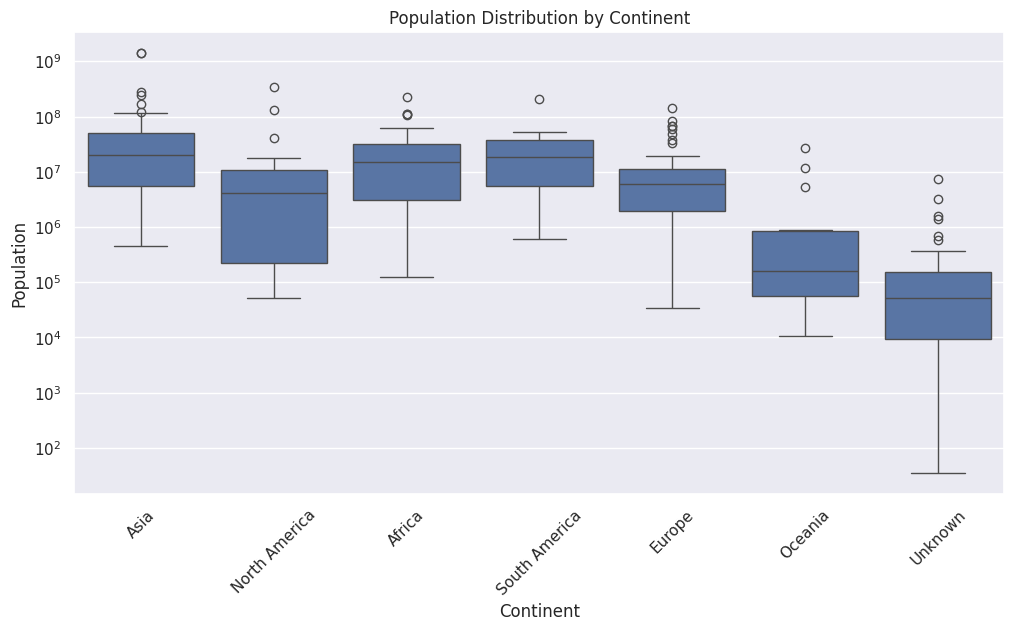

In [29]:
# Boxplot
plt.figure(figsize = (12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(x='Continent',y='Population',data=new_df)
plt.title('Population Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


 **Visualization based on World spread(%)

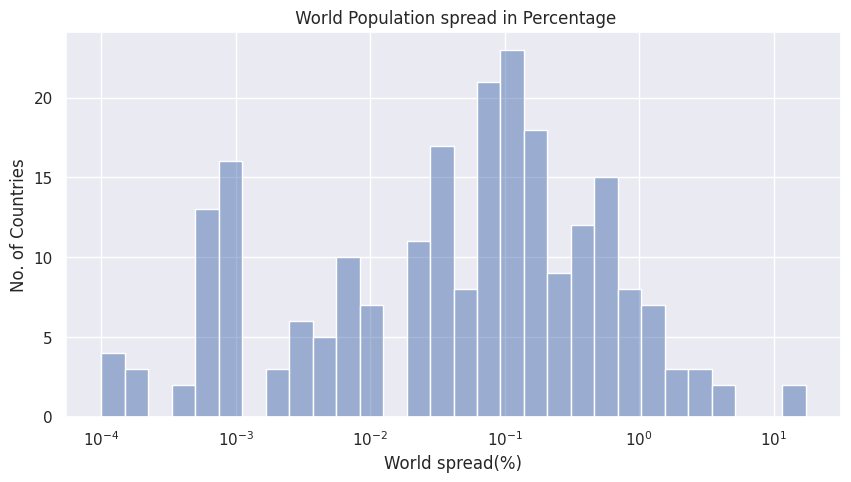

In [30]:
# histogram
plt.figure(figsize = (10,5))
sns.histplot(new_df['World spread(%)'],bins=30,log_scale=True,kde=True)
plt.title(' World Population spread in Percentage')
plt.xlabel('World spread(%)')
plt.ylabel('No. of Countries')
plt.show()

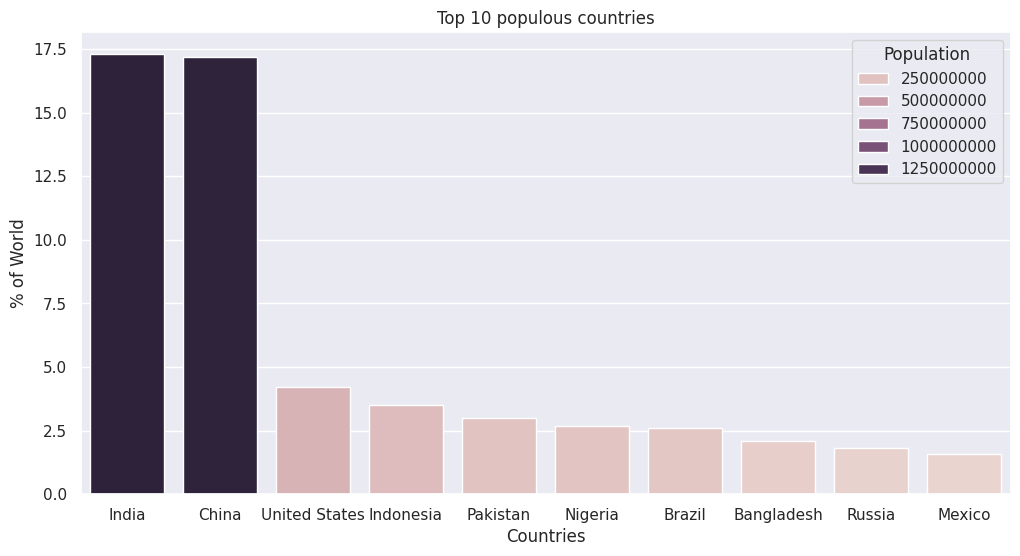

In [31]:
# barchart
plt.figure(figsize = (12,6))
sns.set_theme(style='darkgrid')
sns.barplot(x='Country',y='World spread(%)',hue='Population',data=top_10)
#plt.xticks(rotation=0)
plt.title('Top 10 populous countries')
plt.xlabel('Countries')
plt.ylabel('% of World')
plt.show()

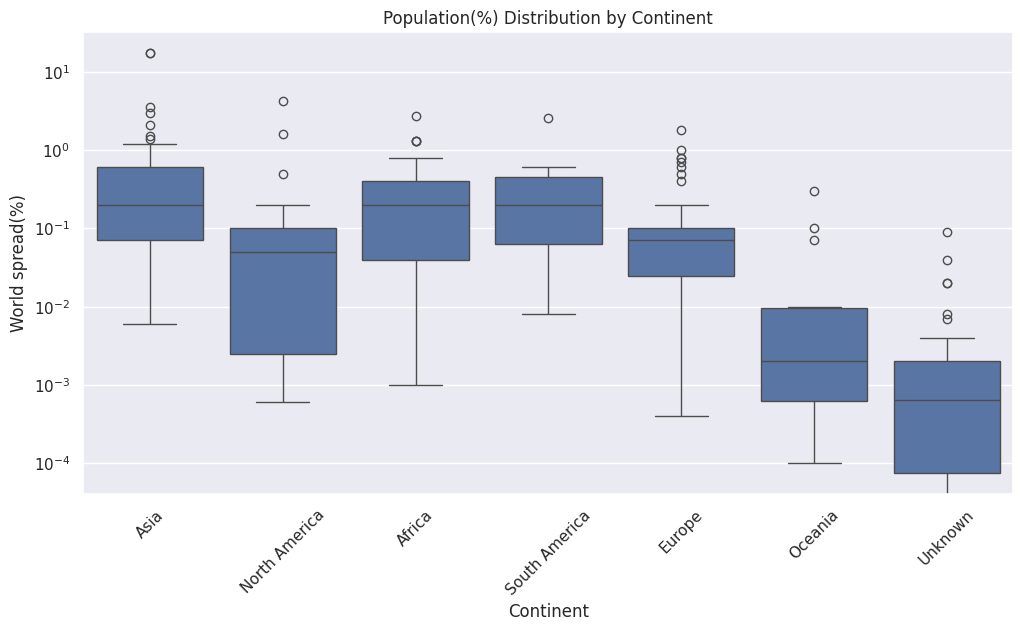

In [32]:
# Boxplot
plt.figure(figsize = (12,6))
sns.set_theme(style='darkgrid')
sns.boxplot(x='Continent',y='World spread(%)',data=new_df)
plt.title('Population(%) Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('World spread(%)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


**Statistical Testing with SciPy**

In [33]:
from scipy import stats

Problem: is there significant difference between the average
          population of countries in Europe vs. Africa.
     Ho -- There is no difference in the average population of countries in Europe and Africa.
     H1 -- There is significant difference in the average population of countries in Europe and Africa .


In [42]:
Europe =  new_df[new_df['Continent'] == 'Europe' ]['Population']
Africa =  new_df[new_df['Continent'] == 'Africa' ]['Population']
print(Europe.head())
print(Africa.head())

9     146028325
19     83555478
20     68620000
21     68265209
25     58922192
Name: Population, dtype: int64
6     223800000
13    109499000
14    109276000
15    105914499
23     63015904
Name: Population, dtype: int64


In [46]:
# perform t-test
t_stat , p_val = stats.ttest_ind(Europe , Africa, equal_var= False)

print(t_stat)
print(p_val)


-1.3736992358217484
0.1727746441155634


In [48]:
# conclusion based on t-test
if p_val < 0.05:
  print('Reject the Null Hypothesis')
  print('There is statistically significant difference in avg.population ')
else:
  print('Fail to reject the Null Hypothesis')
  print('There is no statistically significant difference in avg.population')


Fail to reject the Null Hypothesis
There is no statistically significant difference in avg.population


In [52]:
Europe.sum()

np.int64(738860996)

In [54]:
Africa.sum()

np.int64(1434050865)